In [2]:
#!pip install prophet
import pandas as pd
from prophet import Prophet

In [4]:
df=pd.read_excel(r'/Users/radhikagarg/Desktop/TP TERM 3/TP/data/monthly_returns_collated.xlsx',sheet_name='bitcoin_monthly')
df.tail()

,ds,y
33,2020-10-01,0.008171
34,2020-11-01,0.012607
35,2020-12-01,0.013084
36,2021-01-01,0.005806
37,2021-02-01,0.012504


In [5]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
future = m.make_future_dataframe(periods=24, freq='M')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
57,2022-09-30,0.021434,0.016223,0.026735
58,2022-10-31,-0.003729,-0.008893,0.001878
59,2022-11-30,0.011891,0.006386,0.017349
60,2022-12-31,0.031902,0.026226,0.037600
61,2023-01-31,0.002836,-0.002418,0.008176


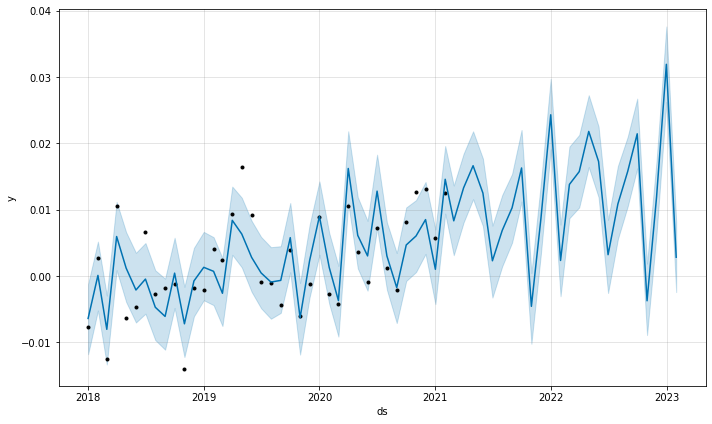

In [11]:
fig1 = m.plot(forecast)

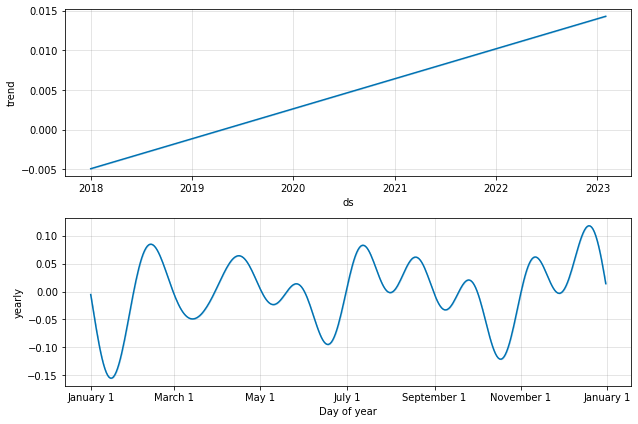

In [12]:
fig2 = m.plot_components(forecast)

In [7]:
#!pip install plotly==4.0

In [13]:
from prophet.plot import plot_plotly, plot_components_plotly
#!pip install ipywidgets
plot_plotly(m, forecast)

In [14]:
plot_components_plotly(m, forecast)

In [15]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()
metric_df.tail()

,ds,yhat,y
57,2022-09-30,0.021434,NaN
58,2022-10-31,-0.003729,NaN
59,2022-11-30,0.011891,NaN
60,2022-12-31,0.031902,NaN
61,2023-01-31,0.002836,NaN


In [16]:
metric_df.dropna(inplace=True)
metric_df.tail()

,ds,yhat,y
33,2020-10-01,0.004681,0.008171
34,2020-11-01,0.006041,0.012607
35,2020-12-01,0.008507,0.013084
36,2021-01-01,0.001019,0.005806
37,2021-02-01,0.014578,0.012504


In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2_score(metric_df.y, metric_df.yhat)

0.6560664547152864

In [18]:
mean_squared_error(metric_df.y, metric_df.yhat)

1.754507786455132e-05

In [19]:
mean_absolute_error(metric_df.y, metric_df.yhat)

0.0034759546295563912